In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import model_selection as ms
from scipy.stats import pearsonr
from sklearn.metrics import make_scorer
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold

from warnings import simplefilter

import pickle
from sklearn.externals import joblib

rand_st=4
#simplefilter("ignore") 


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
elos=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\class_elos.csv')
#elos=pd.read_csv(r'C:\Users\vznam\Downloads\PredictingRatings-master\data\clean_elos.csv')
elos.head()

,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos,Class
0,2354,2411,2382,-57,4765,master
1,1915,1999,1957,-84,3914,novice
2,2446,2191,2318,255,4637,master
3,2168,2075,2121,93,4243,average
4,2437,2254,2345,183,4691,master


In [3]:
#features=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\features.csv')
features=pd.read_csv(r'C:\Users\Asus\PredictingRatings\data\features_new.csv')

print(features.info())
print(features.shape)
features.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24255 entries, 0 to 24254
Columns: 224 entries, 0 to 223
dtypes: float64(224)
memory usage: 41.5 MB
None
(24255, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
count,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,24255.000000,...,24255.000000,24255.000000,24255.000000,24255.00000,24255.000000,24255.000000,24255.00000,24255.000000,24255.000000,24255.000000
mean,0.544877,42.252690,30.881103,11.907442,111.901711,83.967223,-794.591878,988.643950,68.913894,314.678490,...,0.479365,0.465512,0.467697,4.07384,0.472727,0.631293,1.03892,2.015584,1.457308,0.910740
std,0.417736,16.235593,233.709202,445.214702,2310.851869,32.489872,2126.099646,2275.840558,64.170646,475.478471,...,0.619074,0.502279,0.611065,1.83264,0.502640,0.676858,0.74847,2.874868,4.179615,3.663225
min,0.000000,10.000000,-2162.262500,-11447.000000,-12261.000000,19.000000,-12348.000000,-51.000000,0.000000,7.795716,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,-60.758665,0.000000,-362.000000,61.000000,-482.000000,67.000000,30.000000,61.336328,...,0.000000,0.000000,0.000000,3.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.500000,40.000000,24.563636,0.000000,0.000000,79.000000,-75.000000,156.000000,49.000000,145.621548,...,0.000000,0.000000,0.000000,4.00000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000
75%,1.000000,51.000000,123.987715,26.000000,546.500000,102.000000,-18.000000,700.000000,84.000000,291.317992,...,1.000000,1.000000,1.000000,5.00000,1.000000,1.000000,2.00000,3.000000,0.000000,0.000000
max,1.000000,165.000000,2073.289256,11259.000000,12337.000000,329.000000,26.000000,12352.000000,784.000000,3962.575036,...,2.000000,2.000000,2.000000,8.00000,2.000000,2.000000,2.00000,71.000000,35.000000,36.000000


In [4]:
X_train, X_test, Y_train, Y_test =ms.train_test_split(features, elos['Class'], test_size = 0.3,random_state=rand_st)
print ('Train data size: {} instances \nTest data size: {} instances'.format(len(X_train), len(Y_train)))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Train data size: 16978 instances 
Test data size: 16978 instances
(16978, 224)
(16978,)
(7277, 224)
(7277,)


In [5]:
def find_mean_error(pred,elos):
    er=0
    count=0
    for ind, val in enumerate(pred):
        er+=abs(elos.iloc[ind,0]-val[0])
        er+=abs(elos.iloc[ind,1]-val[1])
        count+=2
    return round(er/count,3)

def find_abs_error(pred,elos):
    er=0
    for ind, val in enumerate(pred):
        er+=abs(elos.iloc[ind,0]-val[0])
        er+=abs(elos.iloc[ind,1]-val[1])
    return round(er,3)

def find_root_mean_squared_error(pred,elos):
    er=0
    count=0
    for ind, val in enumerate(pred):
        er+=(elos.iloc[ind,0]-val[0])**2
        er+=(elos.iloc[ind,1]-val[1])**2
        count+=2
    return round((er/count)**0.5,3)

In [6]:
with open(r'C:\Users\Asus\PredictingRatings\voting_class.pkl', 'rb') as f:
    voting_class = pickle.load(f)
    
class_predictions = voting_class.predict(features)

In [7]:
classes=pd.Series(class_predictions)
classes.head()

0    average
1    average
2    average
3    average
4     master
dtype: object

### Подбор модели для новичков

In [8]:
class_novice=classes[classes=='novice']
elos_novice=elos[elos.index.isin(class_novice.index)]
print(elos_novice.shape)
elos_novice.head()

(6448, 6)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos,Class
6,1813,1643,1728,170,3456,novice
14,2406,2147,2276,259,4553,average
15,2054,2099,2076,-45,4153,novice
16,2250,2132,2191,118,4382,average
18,1942,1663,1802,279,3605,novice


In [9]:
features_novice=features[features.index.isin(class_novice.index)]
print(features_novice.shape)
features_novice.head()

(6448, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
6,0.5,64.0,-1081.496063,0.0,0.0,127.0,-10293.0,64.0,100.0,2132.508389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,12.0,0.0
14,0.5,36.0,30.041667,0.0,0.0,72.0,-23.0,81.0,32.0,23.075623,...,0.0,0.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0
15,1.0,32.0,318.317460,1.0,730.0,63.0,-59.0,751.0,417.0,282.440488,...,1.0,1.0,1.0,5.0,1.0,1.0,2.0,0.0,0.0,0.0
16,0.0,88.0,-289.965909,-169.0,-5003.0,176.0,-5227.0,385.0,163.5,771.440888,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,0.0,0.0
18,0.0,40.0,-127.153846,-1137.0,-1136.0,80.0,-1137.0,65.0,48.5,312.097539,...,0.0,1.0,0.0,6.0,1.0,1.0,0.0,6.0,0.0,0.0


In [10]:
target_white_novice=elos_novice['WhiteElo']
target_black_novice=elos_novice['BlackElo']
target_mean_novice=elos_novice['MeanElos']
target_diff_novice=elos_novice['DiffElos']
target_sum_novice=elos_novice['SumElos']

In [11]:
elos_novice.to_csv(r'C:\Users\Asus\PredictingRatings\data\elos_novice.csv', sep=',',index=False)
features_novice.to_csv(r'C:\Users\Asus\PredictingRatings\data\features_novice.csv', sep=',',index=False)

#### baseline

In [12]:
start1 = time.time()
lr_mean_novice= LinearRegression()
lr_mean_novice.fit(features_novice, target_mean_novice)
lr_mean_pred_novice = lr_mean_novice.predict(features_novice)
full_time1=round(time.time() - start1,3)
print(full_time1, 'c')

0.104 c


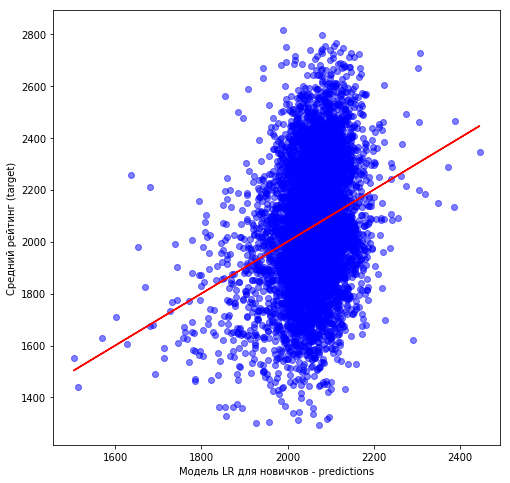

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_mean_pred_novice,target_mean_novice, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для новичков - predictions')
plt.ylabel('Средний рейтинг (target)')
# Линия тренда
z = np.polyfit(lr_mean_pred_novice,target_mean_novice, 1)
p = np.poly1d(z)
plt.plot(lr_mean_pred_novice,p(lr_mean_pred_novice),"r")
plt.show()

In [14]:
mae1=mae(target_mean_novice,lr_mean_pred_novice)
print ('MAE = {:.3f}'.format(mae1))
rmse1 = (mse(target_mean_novice, lr_mean_pred_novice))**0.5
print ('RMSE = {:.3f}'.format(rmse1))
corr_coef1 = pearsonr(target_mean_novice, lr_mean_pred_novice)
print("Correlation coefficient = {:.3f}".format(corr_coef1[0]))

MAE = 185.454
RMSE = 232.791
Correlation coefficient = 0.272


In [15]:
output = pd.DataFrame([[str(lr_mean_novice), mae1,rmse1, corr_coef1[0],full_time1,'Обучение на среднем ЭЛО по начинающим']],
                   columns=['Модель', 'MAE','RMSE','Коэффициент корр. Пирсона', 'Время работы (c)', 'Комментарий'])

output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

In [16]:
start2 = time.time()
lr_diff_novice= LinearRegression()
lr_diff_novice.fit(features_novice, target_diff_novice)
lr_diff_pred_novice = lr_diff_novice.predict(features_novice)
full_time2=round(time.time() - start2,3)
print(full_time2, 'c')

0.117 c


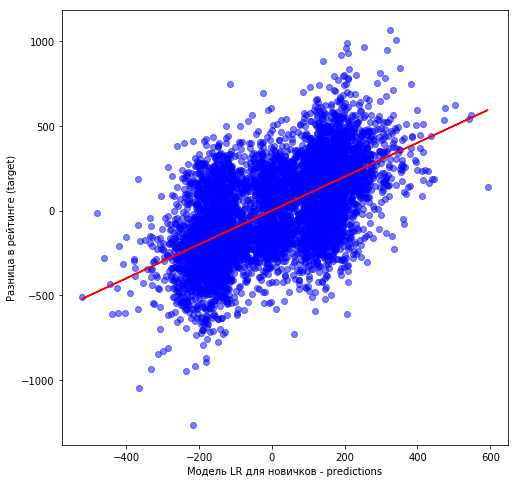

In [17]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_diff_pred_novice,target_diff_novice, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для новичков - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(lr_diff_pred_novice,target_diff_novice, 1)
p = np.poly1d(z)
plt.plot(lr_diff_pred_novice,p(lr_diff_pred_novice),"r")
plt.show()

In [18]:
mae2=mae(target_diff_novice,lr_diff_pred_novice)
print ('MAE = {:.3f}'.format(mae2))
rmse2 = (mse(target_diff_novice, lr_diff_pred_novice))**0.5
print ('RMSE = {:.3f}'.format(rmse2))
corr_coef2 = pearsonr(target_diff_novice, lr_diff_pred_novice)
print("Correlation coefficient = {:.3f}".format(corr_coef2[0]))

MAE = 167.848
RMSE = 213.397
Correlation coefficient = 0.604


In [19]:
output = output.append(pd.Series([str(lr_diff_novice), mae2,rmse2, 
                                  corr_coef2[0],full_time2,'Обучение на разнице ЭЛО по начинающим'],
                                 index=output.columns ),
                      ignore_index=True)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",185.454373,232.791414,0.272042,0.104,Обучение на среднем ЭЛО по начинающим
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",167.847740,213.396908,0.604164,0.117,Обучение на разнице ЭЛО по начинающим


In [21]:
output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

In [22]:
white_elos_novice = lr_mean_pred_novice + lr_diff_pred_novice/2
black_elos_novice = lr_mean_pred_novice-lr_diff_pred_novice/2
pred_elos1=list(zip(white_elos_novice,black_elos_novice))
print(len(pred_elos1))
pred_elos1[:5]

6448


[(2139.804307234145, 2056.396694537587),
 (2061.9392054150176, 2032.95193318807),
 (2036.1493573687756, 1906.943161900527),
 (2024.9612829780003, 2146.7595824710593),
 (1976.3031218296032, 2097.902032124966)]

In [23]:
find_abs_error(pred_elos1,elos_novice),find_mean_error(pred_elos1,elos_novice),find_root_mean_squared_error(pred_elos1,elos_novice)

(2636123.624, 204.414, 256.08)

In [24]:
inner_mae_novice=find_mean_error(pred_elos1,elos_novice)

In [25]:
errors = pd.DataFrame([['Слабые игроки','LinearRegression',
                  find_abs_error(pred_elos1,elos_novice),
                  find_mean_error(pred_elos1,elos_novice),
                   find_root_mean_squared_error(pred_elos1,elos_novice) ]],
                   columns=['Группа','Модель','Абсолютная ошибка', 'MAE','RMSE'])

In [26]:
errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False)

### Подбор модели для среднего уровня

In [27]:
class_avg=classes[classes=='average']
elos_avg=elos[elos.index.isin(class_avg.index)]
print(elos_avg.shape)
elos_avg.head()

(7082, 6)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos,Class
0,2354,2411,2382,-57,4765,master
1,1915,1999,1957,-84,3914,novice
2,2446,2191,2318,255,4637,master
3,2168,2075,2121,93,4243,average
9,2306,2093,2199,213,4399,average


In [28]:
features_avg=features[features.index.isin(class_avg.index)]
print(features_avg.shape)
features_avg.head()

(7082, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.5,19.0,23.947368,3.0,54.0,38.0,-26.0,73.0,20.5,26.431587,...,1.0,1.0,1.0,6.0,1.0,1.0,2.0,0.0,0.0,0.0
1,0.0,53.0,-692.198113,18.0,-11544.0,106.0,-11544.0,93.0,63.0,2286.131735,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,0.0
2,1.0,39.0,49.246753,31.0,196.0,77.0,-30.0,198.0,37.0,51.525093,...,0.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,25.0,306.040816,18.0,875.0,49.0,10.0,917.0,142.0,313.263595,...,1.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0
9,1.0,38.0,253.746667,39.0,1240.0,75.0,15.0,1581.0,65.0,345.365356,...,0.0,0.0,1.0,6.0,0.0,0.0,2.0,3.0,0.0,0.0


In [29]:
target_white_avg=elos_avg['WhiteElo']
target_black_avg=elos_avg['BlackElo']
target_mean_avg=elos_avg['MeanElos']
target_diff_avg=elos_avg['DiffElos']
target_sum_avg=elos_avg['SumElos']

In [30]:
elos_avg.to_csv(r'C:\Users\Asus\PredictingRatings\data\elos_avg.csv', sep=',',index=False)
features_avg.to_csv(r'C:\Users\Asus\PredictingRatings\data\features_avg.csv', sep=',',index=False)

#### baseline

In [31]:
start3 = time.time()
lr_mean_avg= LinearRegression()
lr_mean_avg.fit(features_avg, target_mean_avg)
lr_mean_pred_avg = lr_mean_avg.predict(features_avg)
full_time3=round(time.time() - start3,3)
print(full_time3, 'c')

0.104 c


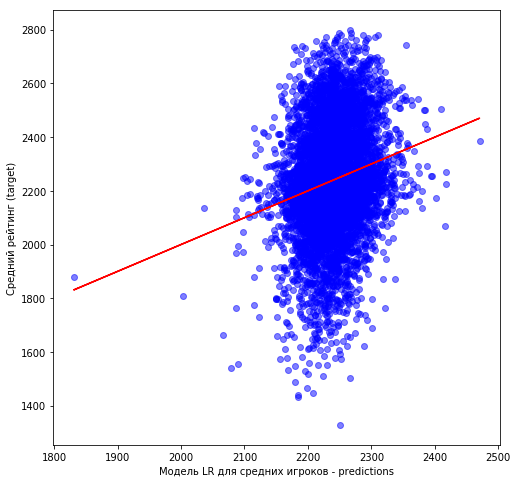

In [32]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_mean_pred_avg,target_mean_avg, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для средних игроков - predictions')
plt.ylabel('Средний рейтинг (target)')
# Линия тренда
z = np.polyfit(lr_mean_pred_avg,target_mean_avg, 1)
p = np.poly1d(z)
plt.plot(lr_mean_pred_avg,p(lr_mean_pred_avg),"r")
plt.show()

In [33]:
mae4=mae(target_mean_avg,lr_mean_pred_avg)
print ('MAE = {:.3f}'.format(mae4))
rmse4 = (mse(target_mean_avg, lr_mean_pred_avg))**0.5
print ('RMSE = {:.3f}'.format(rmse4))
corr_coef4 = pearsonr(target_mean_avg, lr_mean_pred_avg)
print("Correlation coefficient = {:.3f}".format(corr_coef4[0]))

MAE = 148.775
RMSE = 195.120
Correlation coefficient = 0.196


In [34]:
output = output.append(pd.Series([str(lr_mean_avg), mae4,rmse4, 
                                  corr_coef4[0],full_time3,'Обучение на среднем ЭЛО по средним игрокам'],
                                 index=output.columns ),
                      ignore_index=True)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",185.454373,232.791414,0.272042,0.104,Обучение на среднем ЭЛО по начинающим
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",167.847740,213.396908,0.604164,0.117,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",148.774801,195.120413,0.195972,0.104,Обучение на среднем ЭЛО по средним игрокам


In [35]:
start5 = time.time()
lr_diff_avg= LinearRegression()
lr_diff_avg.fit(features_avg, target_diff_avg)
lr_diff_pred_avg = lr_diff_avg.predict(features_avg)
full_time5=round(time.time() - start5,3)
print(full_time5, 'c')

0.105 c


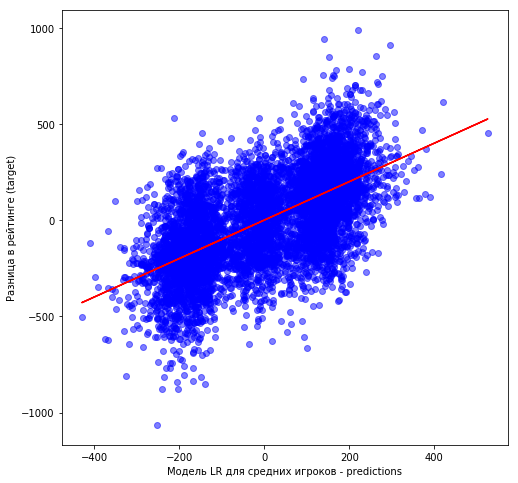

In [36]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_diff_pred_avg,target_diff_avg, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для средних игроков - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(lr_diff_pred_avg,target_diff_avg, 1)
p = np.poly1d(z)
plt.plot(lr_diff_pred_avg,p(lr_diff_pred_avg),"r")
plt.show()

In [37]:
mae5=mae(target_diff_avg,lr_diff_pred_avg)
print ('MAE = {:.3f}'.format(mae5))
rmse5 = (mse(target_diff_avg, lr_diff_pred_avg))**0.5
print ('RMSE = {:.3f}'.format(rmse5))
corr_coef5 = pearsonr(target_diff_avg, lr_diff_pred_avg)
print("Correlation coefficient = {:.3f}".format(corr_coef5[0]))

MAE = 153.681
RMSE = 194.776
Correlation coefficient = 0.622


In [38]:
output = output.append(pd.Series([str(lr_diff_avg), mae5,rmse5, 
                                  corr_coef5[0],full_time5,'Обучение на разнице в  ЭЛО по средним игрокам'],
                                 index=output.columns ),
                      ignore_index=True)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",185.454373,232.791414,0.272042,0.104,Обучение на среднем ЭЛО по начинающим
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",167.847740,213.396908,0.604164,0.117,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",148.774801,195.120413,0.195972,0.104,Обучение на среднем ЭЛО по средним игрокам
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",153.680899,194.776371,0.621906,0.105,Обучение на разнице в ЭЛО по средним игрокам


In [39]:
white_elos_avg = lr_mean_pred_avg + lr_diff_pred_avg/2
black_elos_avg = lr_mean_pred_avg-lr_diff_pred_avg/2
pred_elos2=list(zip(white_elos_avg,black_elos_avg))
print(len(pred_elos2))
pred_elos2[:5]

7082


[(2237.8726261312795, 2264.7587172730973),
 (2228.8642012611986, 2352.923871599765),
 (2359.3797633002046, 2228.8589024123044),
 (2310.1100838791112, 2029.3835280468543),
 (2298.339017214484, 2207.919136508964)]

In [40]:
find_abs_error(pred_elos2,elos_avg),find_mean_error(pred_elos2,elos_avg), find_root_mean_squared_error(pred_elos2,elos_avg)

(2422902.489, 171.061, 218.08)

In [41]:
errors = errors.append(pd.Series(['Средние игроки','LinearRegression',
                  find_abs_error(pred_elos2,elos_avg),
                  find_mean_error(pred_elos2,elos_avg),
                   find_root_mean_squared_error(pred_elos2,elos_avg)],index=errors.columns) ,ignore_index=True)

errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False)
errors

,Группа,Модель,Абсолютная ошибка,MAE,RMSE
0,Слабые игроки,LinearRegression,2636123.624,204.414,256.08
1,Средние игроки,LinearRegression,2422902.489,171.061,218.08


In [42]:
inner_mae_avg = find_mean_error(pred_elos2,elos_avg)

#### Может еще больше разбить, раз так мало оценок меньше 2000?

In [43]:
elos_2000=elos[(elos["MeanElos"]<=2000)]
print(elos_2000.shape)
elos_2000.head()

(3855, 6)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos,Class
1,1915,1999,1957,-84,3914,novice
6,1813,1643,1728,170,3456,novice
13,1877,1851,1864,26,3728,novice
18,1942,1663,1802,279,3605,novice
39,1870,2086,1978,-216,3956,novice


### Подбор модели для мастеров

In [44]:
class_master=classes[classes=='master']
elos_master=elos[elos.index.isin(class_master.index)]
print(elos_master.shape)
elos_master.head()

(9678, 6)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos,Class
4,2437,2254,2345,183,4691,master
5,2449,2201,2325,248,4650,master
7,2553,2052,2302,501,4605,master
8,2611,2520,2565,91,5131,grandmaster
10,2108,2273,2190,-165,4381,average


In [45]:
features_master=features[features.index.isin(class_master.index)]
print(features_master.shape)
features_master.head()

(9678, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
4,0.5,29.0,30.827586,18.0,-11.0,58.0,-15.0,94.0,29.0,24.845827,...,0.0,1.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0
5,1.0,38.0,237.440000,32.0,898.0,75.0,-4.0,6395.0,104.0,744.029556,...,0.0,1.0,0.0,4.0,1.0,1.0,1.0,2.0,0.0,0.0
7,1.0,46.0,106.923077,37.0,410.0,91.0,-3.0,445.0,83.0,93.119943,...,0.0,0.0,0.0,5.0,0.0,0.0,1.0,2.0,0.0,0.0
8,1.0,30.0,139.033898,22.0,351.0,59.0,-5.0,420.0,100.0,119.455540,...,1.0,1.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,14.0
10,0.0,50.0,-239.680000,6.0,-682.0,100.0,-683.0,63.0,298.0,256.674225,...,1.0,1.0,0.0,2.0,1.0,0.0,0.0,10.0,13.0,14.0


In [46]:
target_white_master=elos_master['WhiteElo']
target_black_master=elos_master['BlackElo']
target_mean_master=elos_master['MeanElos']
target_diff_master=elos_master['DiffElos']
target_sum_master=elos_master['SumElos']

In [47]:
elos_master.to_csv(r'C:\Users\Asus\PredictingRatings\data\elos_master.csv', sep=',',index=False)
features_master.to_csv(r'C:\Users\Asus\PredictingRatings\data\features_master.csv', sep=',',index=False)

#### baseline

In [48]:
start6 = time.time()
lr_mean_master= LinearRegression()
lr_mean_master.fit(features_master, target_mean_master)
lr_mean_pred_master = lr_mean_master.predict(features_master)
full_time6=round(time.time() - start6,3)
print(full_time6, 'c')

0.113 c


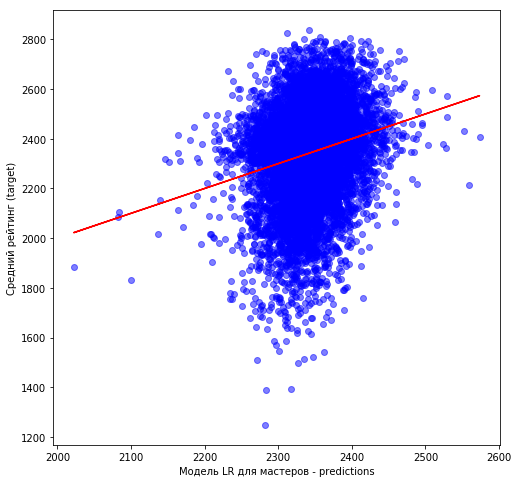

In [49]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_mean_pred_master,target_mean_master, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для мастеров - predictions')
plt.ylabel('Средний рейтинг (target)')
# Линия тренда
z = np.polyfit(lr_mean_pred_master,target_mean_master, 1)
p = np.poly1d(z)
plt.plot(lr_mean_pred_master,p(lr_mean_pred_master),"r")
plt.show()

In [50]:
mae6=mae(target_mean_master,lr_mean_pred_master)
print ('MAE = {:.3f}'.format(mae6))
rmse6 = (mse(target_mean_master, lr_mean_pred_master))**0.5
print ('RMSE = {:.3f}'.format(rmse6))
corr_coef6 = pearsonr(target_mean_master, lr_mean_pred_master)
print("Correlation coefficient = {:.3f}".format(corr_coef6[0]))

MAE = 144.548
RMSE = 186.916
Correlation coefficient = 0.212


In [51]:
output = output.append(pd.Series([str(lr_mean_master), mae6,rmse6, 
                                  corr_coef6[0],full_time6,'Обучение на среднем ЭЛО по мастерам'],
                                 index=output.columns ),
                      ignore_index=True)
output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)
output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",185.454373,232.791414,0.272042,0.104,Обучение на среднем ЭЛО по начинающим
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",167.847740,213.396908,0.604164,0.117,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",148.774801,195.120413,0.195972,0.104,Обучение на среднем ЭЛО по средним игрокам
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",153.680899,194.776371,0.621906,0.105,Обучение на разнице в ЭЛО по средним игрокам
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",144.547821,186.916248,0.211849,0.113,Обучение на среднем ЭЛО по мастерам


In [52]:
start7 = time.time()
lr_diff_master= LinearRegression()
lr_diff_master.fit(features_master, target_diff_master)
lr_diff_pred_master = lr_diff_master.predict(features_master)
full_time7=round(time.time() - start7,3)
print(full_time7, 'c')

0.12 c


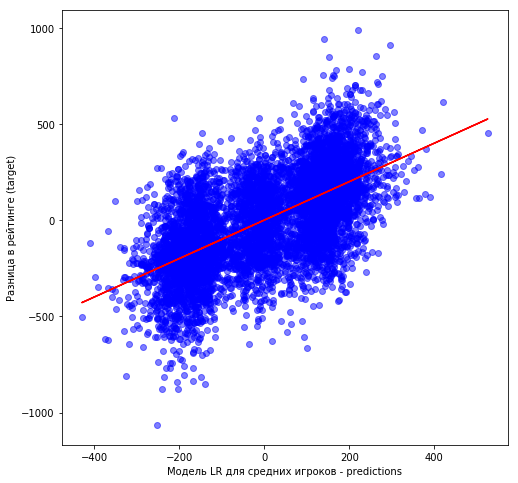

In [53]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_diff_pred_avg,target_diff_avg, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для средних игроков - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(lr_diff_pred_avg,target_diff_avg, 1)
p = np.poly1d(z)
plt.plot(lr_diff_pred_avg,p(lr_diff_pred_avg),"r")
plt.show()

In [54]:
mae7=mae(target_diff_master,lr_diff_pred_master)
print ('MAE = {:.3f}'.format(mae7))
rmse7 = (mse(target_diff_master, lr_diff_pred_master))**0.5
print ('RMSE = {:.3f}'.format(rmse7))
corr_coef7 = pearsonr(target_diff_master, lr_diff_pred_master)
print("Correlation coefficient = {:.3f}".format(corr_coef7[0]))

MAE = 137.466
RMSE = 174.230
Correlation coefficient = 0.542


In [55]:
output = output.append(pd.Series([str(lr_diff_master), mae7,rmse7, 
                                  corr_coef7[0],full_time7,'Обучение на разнице в  ЭЛО по мастерам'],
                                 index=output.columns ),
                      ignore_index=True)

output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",185.454373,232.791414,0.272042,0.104,Обучение на среднем ЭЛО по начинающим
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",167.847740,213.396908,0.604164,0.117,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",148.774801,195.120413,0.195972,0.104,Обучение на среднем ЭЛО по средним игрокам
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",153.680899,194.776371,0.621906,0.105,Обучение на разнице в ЭЛО по средним игрокам
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",144.547821,186.916248,0.211849,0.113,Обучение на среднем ЭЛО по мастерам
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",137.465903,174.230219,0.542416,0.120,Обучение на разнице в ЭЛО по мастерам


In [56]:
white_elos_master = lr_mean_pred_master + lr_diff_pred_master/2
black_elos_master = lr_mean_pred_master-lr_diff_pred_master/2
pred_elos3=list(zip(white_elos_master,black_elos_master))
print(len(pred_elos3))
pred_elos3[:5]

9678


[(2350.5894080808375, 2352.3379793328895),
 (2455.6205260051147, 2305.2239710519007),
 (2434.9000764580383, 2271.0008193773833),
 (2446.073053268749, 2229.886799858398),
 (2273.6244438757612, 2436.974659366014)]

In [57]:
find_abs_error(pred_elos3,elos_master),find_mean_error(pred_elos3,elos_master), find_root_mean_squared_error(pred_elos3,elos_master)

(3121463.524, 161.266, 206.223)

In [58]:
errors = errors.append(pd.Series(['Мастера','LinearRegression',
                  find_abs_error(pred_elos3,elos_master),
                  find_mean_error(pred_elos3,elos_master),
                   find_root_mean_squared_error(pred_elos3,elos_master)],index=errors.columns) ,ignore_index=True)

errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False,sheet_name='Errors')
errors

,Группа,Модель,Абсолютная ошибка,MAE,RMSE
0,Слабые игроки,LinearRegression,2636123.624,204.414,256.080
1,Средние игроки,LinearRegression,2422902.489,171.061,218.080
2,Мастера,LinearRegression,3121463.524,161.266,206.223


In [59]:
inner_mae_master=find_mean_error(pred_elos3,elos_master)

### Подбор модели для гроссмейстеров

In [60]:
class_grandmaster=classes[classes=='grandmaster']
elos_grandmaster=elos[elos.index.isin(class_grandmaster.index)]
print(elos_grandmaster.shape)
elos_grandmaster.head()

(1047, 6)


,WhiteElo,BlackElo,MeanElos,DiffElos,SumElos,Class
24,2413,2315,2364,98,4728,master
127,2489,2621,2555,-132,5110,grandmaster
136,2484,2463,2473,21,4947,master
137,2597,2605,2601,-8,5202,grandmaster
184,2591,2590,2590,1,5181,grandmaster


In [61]:
features_grandmaster=features[features.index.isin(class_grandmaster.index)]
print(features_grandmaster.shape)
features_grandmaster.head()

(1047, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
24,0.5,36.0,10.833333,0.0,0.0,72.0,-12.0,64.0,8.5,16.455327,...,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0
127,0.5,41.0,13.666667,0.0,0.0,81.0,-26.0,63.0,12.0,21.044925,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
136,0.0,69.0,-120.386861,0.0,-11239.0,137.0,-11239.0,217.0,83.0,957.923837,...,0.0,1.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0
137,0.5,31.0,20.721311,17.0,23.0,61.0,-4.0,49.0,19.0,12.659644,...,1.0,0.0,0.0,7.0,0.0,1.0,2.0,0.0,0.0,0.0
184,0.0,49.0,-56.500000,56.0,-562.0,98.0,-646.0,133.0,94.0,173.861677,...,1.0,0.0,1.0,5.0,0.0,0.0,1.0,2.0,0.0,0.0


In [62]:
target_white_grandmaster=elos_grandmaster['WhiteElo']
target_black_grandmaster=elos_grandmaster['BlackElo']
target_mean_grandmaster=elos_grandmaster['MeanElos']
target_diff_grandmaster=elos_grandmaster['DiffElos']
target_sum_grandmaster=elos_grandmaster['SumElos']

In [63]:
elos_grandmaster.to_csv(r'C:\Users\Asus\PredictingRatings\data\elos_grandmaster.csv', sep=',',index=False)
features_grandmaster.to_csv(r'C:\Users\Asus\PredictingRatings\data\features_grandmaster.csv', sep=',',index=False)

#### baseline

In [64]:
start8 = time.time()
lr_mean_grandmaster= LinearRegression()
lr_mean_grandmaster.fit(features_grandmaster, target_mean_grandmaster)
lr_mean_pred_grandmaster = lr_mean_grandmaster.predict(features_grandmaster)
full_time8=round(time.time() - start8,3)
print(full_time8, 'c')

0.026 c


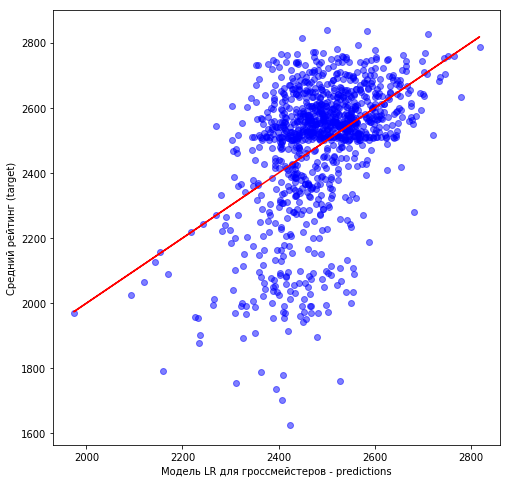

In [65]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_mean_pred_grandmaster,target_mean_grandmaster, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для гроссмейстеров - predictions')
plt.ylabel('Средний рейтинг (target)')
# Линия тренда
z = np.polyfit(lr_mean_pred_grandmaster,target_mean_grandmaster, 1)
p = np.poly1d(z)
plt.plot(lr_mean_pred_grandmaster,p(lr_mean_pred_grandmaster),"r")
plt.show()

In [66]:
mae8=mae(target_mean_grandmaster,lr_mean_pred_grandmaster)
print ('MAE = {:.3f}'.format(mae8))
rmse8 = (mse(target_mean_grandmaster, lr_mean_pred_grandmaster))**0.5
print ('RMSE = {:.3f}'.format(rmse8))
corr_coef8 = pearsonr(target_mean_grandmaster, lr_mean_pred_grandmaster)
print("Correlation coefficient = {:.3f}".format(corr_coef8[0]))

MAE = 132.400
RMSE = 179.034
Correlation coefficient = 0.462


In [67]:
output = output.append(pd.Series([str(lr_mean_grandmaster), mae8,rmse8, 
                                  corr_coef8[0],full_time8,'Обучение на среднем ЭЛО по гроссмейстерам'],
                                 index=output.columns ),
                      ignore_index=True)

output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",185.454373,232.791414,0.272042,0.104,Обучение на среднем ЭЛО по начинающим
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",167.847740,213.396908,0.604164,0.117,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",148.774801,195.120413,0.195972,0.104,Обучение на среднем ЭЛО по средним игрокам
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",153.680899,194.776371,0.621906,0.105,Обучение на разнице в ЭЛО по средним игрокам
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",144.547821,186.916248,0.211849,0.113,Обучение на среднем ЭЛО по мастерам
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",137.465903,174.230219,0.542416,0.120,Обучение на разнице в ЭЛО по мастерам
6,"LinearRegression(copy_X=True, fit_intercept=Tr...",132.400047,179.033987,0.462350,0.026,Обучение на среднем ЭЛО по гроссмейстерам


In [68]:
start9 = time.time()
lr_diff_grandmaster= LinearRegression()
lr_diff_grandmaster.fit(features_grandmaster, target_diff_grandmaster)
lr_diff_pred_grandmaster = lr_diff_grandmaster.predict(features_grandmaster)
full_time9=round(time.time() - start9,3)
print(full_time9, 'c')

0.03 c


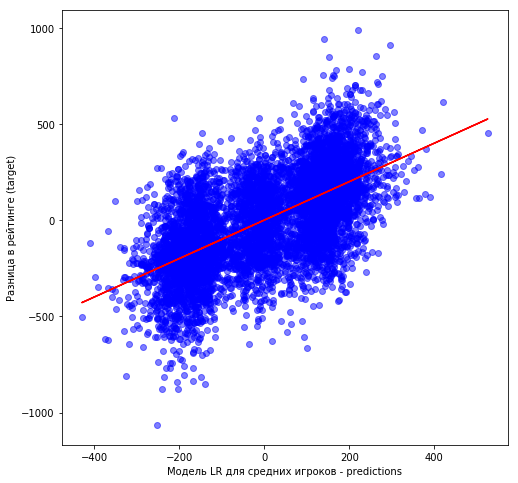

In [69]:
plt.figure(figsize=(8, 8))
plt.scatter(lr_diff_pred_avg,target_diff_avg, color = 'b',alpha=0.5)
plt.xlabel('Модель LR для средних игроков - predictions')
plt.ylabel('Разница в рейтинге (target)')
# Линия тренда
z = np.polyfit(lr_diff_pred_avg,target_diff_avg, 1)
p = np.poly1d(z)
plt.plot(lr_diff_pred_avg,p(lr_diff_pred_avg),"r")
plt.show()

In [70]:
mae9=mae(target_diff_grandmaster,lr_diff_pred_grandmaster)
print ('MAE = {:.3f}'.format(mae7))
rmse9 = (mse(target_diff_grandmaster, lr_diff_pred_grandmaster))**0.5
print ('RMSE = {:.3f}'.format(rmse9))
corr_coef9 = pearsonr(target_diff_grandmaster, lr_diff_pred_grandmaster)
print("Correlation coefficient = {:.3f}".format(corr_coef9[0]))

MAE = 137.466
RMSE = 120.574
Correlation coefficient = 0.523


In [71]:
output = output.append(pd.Series([str(lr_diff_grandmaster), mae9,rmse9, 
                                  corr_coef9[0],full_time9,'Обучение на разнице в  ЭЛО по гроссмейстерам'],
                                 index=output.columns ),
                      ignore_index=True)

output.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_results.xlsx',index=False)

output

,Модель,MAE,RMSE,Коэффициент корр. Пирсона,Время работы (c),Комментарий
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",185.454373,232.791414,0.272042,0.104,Обучение на среднем ЭЛО по начинающим
1,"LinearRegression(copy_X=True, fit_intercept=Tr...",167.847740,213.396908,0.604164,0.117,Обучение на разнице ЭЛО по начинающим
2,"LinearRegression(copy_X=True, fit_intercept=Tr...",148.774801,195.120413,0.195972,0.104,Обучение на среднем ЭЛО по средним игрокам
3,"LinearRegression(copy_X=True, fit_intercept=Tr...",153.680899,194.776371,0.621906,0.105,Обучение на разнице в ЭЛО по средним игрокам
4,"LinearRegression(copy_X=True, fit_intercept=Tr...",144.547821,186.916248,0.211849,0.113,Обучение на среднем ЭЛО по мастерам
5,"LinearRegression(copy_X=True, fit_intercept=Tr...",137.465903,174.230219,0.542416,0.120,Обучение на разнице в ЭЛО по мастерам
6,"LinearRegression(copy_X=True, fit_intercept=Tr...",132.400047,179.033987,0.462350,0.026,Обучение на среднем ЭЛО по гроссмейстерам
7,"LinearRegression(copy_X=True, fit_intercept=Tr...",91.863665,120.573687,0.523059,0.030,Обучение на разнице в ЭЛО по гроссмейстерам


In [72]:
white_elos_grandmaster = lr_mean_pred_grandmaster + lr_diff_pred_grandmaster/2
black_elos_grandmaster = lr_mean_pred_grandmaster-lr_diff_pred_grandmaster/2
pred_elos4=list(zip(white_elos_grandmaster,black_elos_grandmaster))
print(len(pred_elos4))
pred_elos4[:5]

1047


[(2353.9211208038764, 2361.0746964063324),
 (2370.94758170398, 2278.4035604759692),
 (2581.743621809488, 2469.574900280144),
 (2392.4122584844094, 2377.8058538818445),
 (2464.5771821270637, 2508.0928124808015)]

In [73]:
find_abs_error(pred_elos4,elos_grandmaster),find_mean_error(pred_elos4,elos_grandmaster),find_root_mean_squared_error(pred_elos4,elos_grandmaster)

(293357.584, 140.094, 188.908)

In [74]:
errors = errors.append(pd.Series(['Гроссмейстеры','LinearRegression',
                  find_abs_error(pred_elos4,elos_grandmaster),
                  find_mean_error(pred_elos4,elos_grandmaster),
                   find_root_mean_squared_error(pred_elos4,elos_grandmaster)],index=errors.columns) ,ignore_index=True)

errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False)
errors

,Группа,Модель,Абсолютная ошибка,MAE,RMSE
0,Слабые игроки,LinearRegression,2636123.624,204.414,256.080
1,Средние игроки,LinearRegression,2422902.489,171.061,218.080
2,Мастера,LinearRegression,3121463.524,161.266,206.223
3,Гроссмейстеры,LinearRegression,293357.584,140.094,188.908


In [75]:
inner_mae_grandmaster=find_mean_error(pred_elos4,elos_grandmaster)

In [76]:
lr_mae=(inner_mae_grandmaster+inner_mae_master+inner_mae_avg+inner_mae_novice)/4
lr_mae

169.20875

In [77]:
lr_abs=(find_abs_error(pred_elos1,elos_novice)+
        find_abs_error(pred_elos2,elos_avg)+
        find_abs_error(pred_elos3,elos_master)+
        find_abs_error(pred_elos4,elos_grandmaster))/4
lr_abs

2118461.80525

In [78]:
lr_rmse=(find_root_mean_squared_error(pred_elos1,elos_novice)+
         find_root_mean_squared_error(pred_elos2,elos_avg)+
         find_root_mean_squared_error(pred_elos3,elos_master)+
         find_root_mean_squared_error(pred_elos4,elos_grandmaster))/4
lr_rmse

217.32275

In [79]:
errors = errors.append(pd.Series(['Общая ошибка','LinearRegression',
                  lr_abs,
                  lr_mae,
                lr_rmse],index=errors.columns) ,ignore_index=True)

errors.to_excel(r'C:\Users\Asus\PredictingRatings\models\class_errors.xlsx',index=False)
errors

,Группа,Модель,Абсолютная ошибка,MAE,RMSE
0,Слабые игроки,LinearRegression,2.636124e+06,204.41400,256.08000
1,Средние игроки,LinearRegression,2.422902e+06,171.06100,218.08000
2,Мастера,LinearRegression,3.121464e+06,161.26600,206.22300
3,Гроссмейстеры,LinearRegression,2.933576e+05,140.09400,188.90800
4,Общая ошибка,LinearRegression,2.118462e+06,169.20875,217.32275
